<a href="https://colab.research.google.com/github/Pritush09/DeepLearning-Pytorch/blob/master/02_NN_Classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

In [4]:
 nn

<module 'torch.nn' from '/usr/local/lib/python3.9/dist-packages/torch/nn/__init__.py'>

In [6]:
weight = 0.3
bias = 0.9
X = torch.arange(0,50).unsqueeze(dim=1)
y= weight*X + bias
X.shape , y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [7]:
range_ = int(0.8*len(X))
X_train = X[:range_]
X_test = X[range_:]
y_train = y[:range_]
y_test = y[range_:]

len(y_test) , len(y_train) , len(X_test) , len(X_train)

(10, 40, 10, 40)

In [27]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  # The prop keyword is used to change the font size property. It is used in Matplotlib as Using a prop keyword for changing the font size in legend.
  plt.legend(prop={"size": 14});

In [9]:
y_train.dtype

torch.float32

In [10]:
y_test.dtype

torch.float32

In [11]:
X_train.dtype

torch.int64

In [12]:
X_train = X_train.type(torch.float)
X_train.dtype

torch.float32

In [13]:
X_test = X_test.type(torch.float)
X_test.dtype

torch.float32

In [14]:
# model building 
class Linear(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1,out_features=1)
    #print(self.linear.weight.dtype)
    #print(self.linear.bias)
  
  def forward(self , x:torch.tensor)->torch.tensor:
    return self.linear(x)
  
  

In [22]:
torch.manual_seed(42)
model = Linear()
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]])),
             ('linear.bias', tensor([0.8300]))])

In [23]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params = model.parameters(),lr=0.001)

In [24]:
# Training
torch.manual_seed(42)

epochs = 1000
for epoch in range(epochs):
  # training mode
  model.train()

  y_pred = model(X_train)

  loss = loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():
    
    test_pred = model(X_test)

    test_loss = loss_fn(test_pred,y_test)

    if epoch % 10 ==0:
      print(f"epoch : {epoch}   |   Train loss : {loss}     |    test_loss : {test_loss}")

epoch : 0   |   Train loss : 109.5481185913086     |    test_loss : 0.276044100522995
epoch : 10   |   Train loss : 0.0019669453613460064     |    test_loss : 0.00370298745110631
epoch : 20   |   Train loss : 0.0019466595258563757     |    test_loss : 0.0036646523512899876
epoch : 30   |   Train loss : 0.001926590339280665     |    test_loss : 0.003626864403486252
epoch : 40   |   Train loss : 0.0019067205721512437     |    test_loss : 0.003589580999687314
epoch : 50   |   Train loss : 0.0018870525527745485     |    test_loss : 0.0035524521954357624
epoch : 60   |   Train loss : 0.0018675907049328089     |    test_loss : 0.0035157606471329927
epoch : 70   |   Train loss : 0.0018483282765373588     |    test_loss : 0.0034795149695128202
epoch : 80   |   Train loss : 0.0018292696913704276     |    test_loss : 0.0034436031710356474
epoch : 90   |   Train loss : 0.0018103981856256723     |    test_loss : 0.0034081016201525927
epoch : 100   |   Train loss : 0.0017917327350005507     |    te

In [18]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[nan]])),
             ('linear.bias', tensor([nan]))])

In [25]:
model.eval()
with torch.inference_mode():
  y_pred = model(X_test)

y_pred

tensor([[12.9271],
        [13.2291],
        [13.5310],
        [13.8330],
        [14.1350],
        [14.4370],
        [14.7390],
        [15.0409],
        [15.3429],
        [15.6449]])

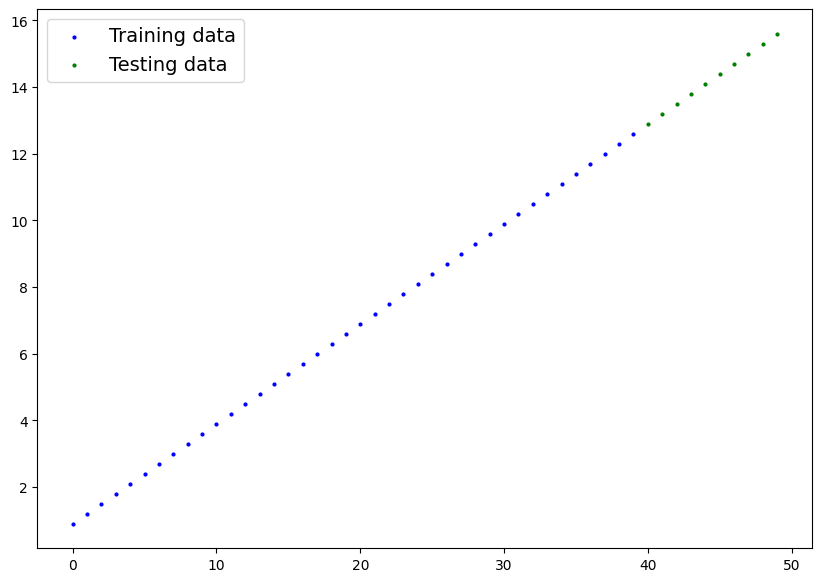

In [29]:
plot_predictions()

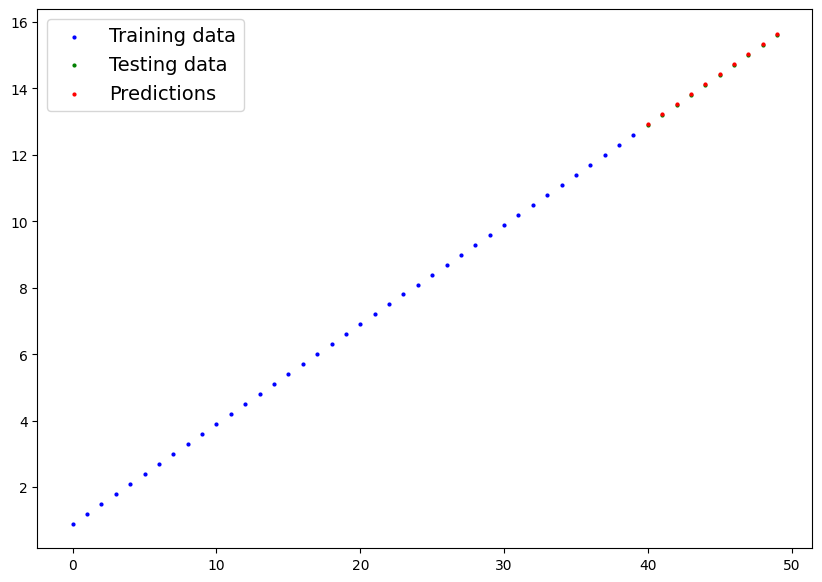

In [30]:
plot_predictions(predictions=y_pred)

In [31]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.3020]])),
             ('linear.bias', tensor([0.8479]))])